In [1]:
from itertools import product
from scipy import stats
import os
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="white", color_codes=True)


In [2]:
# Reading dataset
df = pd.read_csv("Mall_Customers.csv")


In [3]:
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# General View of Dataset


In [4]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Checking null value of dataset


In [5]:
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.dtypes


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

# Descriptive statistics and Distribution


In [7]:
def statistics(variable):
    if variable.dtype == "int64" or variable.dtype == "float64":
        return pd.DataFrame([[variable.name, np.mean(variable), stats.mode(variable)[0][0], np.median(variable), np.var(variable)]],
                            columns=["Variable", "Mean", "Mode", "Median", "Variance"]).set_index("Variable")
    else:
        return pd.DataFrame(variable.value_counts())


In [8]:
def graph_histo(x):
    if x.dtype == "int64" or x.dtype == "float64":
        # Select size of bins by getting maximum and minimum and divide the substraction by 10
        size_bins = 10
        # Get the title by getting the name of the column
        title = x.name
        # Assign random colors to each graph
        color_kde = list(map(float, np.random.rand(3,)))
        color_bar = list(map(float, np.random.rand(3,)))

        # Plot the displot
        sns.distplot(x, bins=size_bins, kde_kws={"lw": 1.5, "alpha": 0.8, "color": color_kde},
                     hist_kws={"linewidth": 1.5, "edgecolor": "grey",
                               "alpha": 0.4, "color": color_bar})
        # Customize ticks and labels
        plt.xticks(size=14)
        plt.yticks(size=14)
        plt.ylabel("Frequency", size=16, labelpad=15)
        # Customize title
        plt.title(title, size=18)
        # Customize grid and axes visibility
        plt.grid(False)
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.gca().spines["bottom"].set_visible(False)
        plt.gca().spines["left"].set_visible(False)
    else:
        x = pd.DataFrame(x)
        # Plot
        sns.catplot(x=x.columns[0], kind="count", palette="spring", data=x)
        # Customize title
        title = x.columns[0]
        plt.title(title, size=18)
        # Customize ticks and labels
        plt.xticks(size=14)
        plt.yticks(size=14)
        plt.xlabel("")
        plt.ylabel("Counts", size=16, labelpad=15)
        # Customize grid and axes visibility
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.gca().spines["bottom"].set_visible(False)
        plt.gca().spines["left"].set_visible(False)


## Spending Score


In [9]:
spending = df["Spending Score (1-100)"]


In [10]:
statistics(spending)


,Mean,Mode,Median,Variance
Variable,,,,
Spending Score (1-100),50.2,42,50.0,663.52


D:\Program Files\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


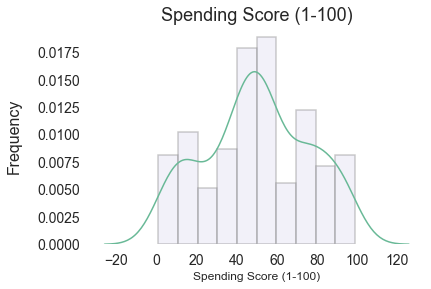

In [11]:
graph_histo(spending)


## Anual Income


In [12]:
income = df["Annual Income (k$)"]


In [13]:
statistics(income)


,Mean,Mode,Median,Variance
Variable,,,,
Annual Income (k$),60.56,54,61.5,686.3864


D:\Program Files\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


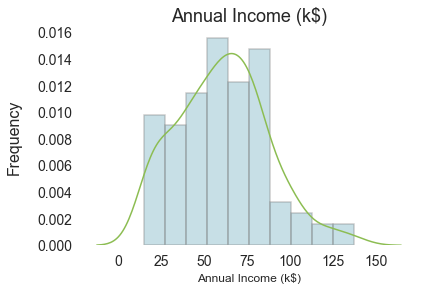

In [14]:
graph_histo(income)


## Age


In [15]:
age = df["Age"]


In [16]:
statistics(age)


,Mean,Mode,Median,Variance
Variable,,,,
Age,38.85,32,36.0,194.1575


D:\Program Files\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


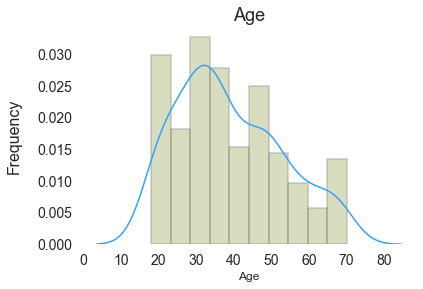

In [17]:
graph_histo(age)


## Gender


In [18]:
gender = df["Gender"]


In [19]:
statistics(gender)


,Gender
Female,112
Male,88


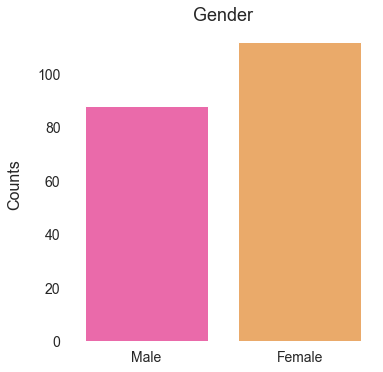

In [20]:
graph_histo(gender)


# Compare relationships among features


D:\Program Files\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

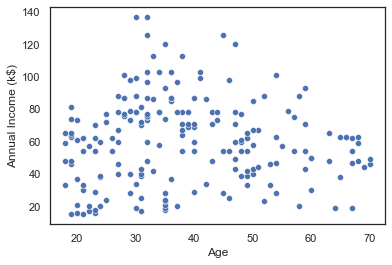

In [21]:
sns.scatterplot('Age', 'Annual Income (k$)', data=df)


D:\Program Files\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

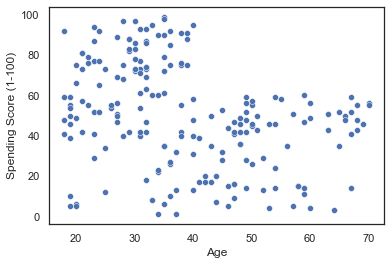

In [22]:
sns.scatterplot('Age', 'Spending Score (1-100)', data=df)


D:\Program Files\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

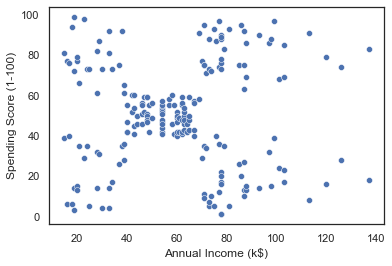

In [23]:
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=df)


In [24]:
#  Drop CustomerID and Gender column
df.drop(['CustomerID', 'Gender'], axis=1, inplace=True)


In [25]:
# Scaling using StandardScaler
se = StandardScaler().fit_transform(df)


In [26]:
from sklearn.mixture import GaussianMixture as gmm


# Finding best n components and best covariance


In [27]:
n_comp = np.arange(1, 10)
cova_type = ['full', 'spherical', 'diag']


In [28]:
bic = []
aic = []


In [29]:
gmm_params = list(product(n_comp, cova_type))


In [30]:
for i in gmm_params:
    GMM = gmm(n_components=i[0], covariance_type=i[1], random_state=0).fit(se)
    bic.append(GMM.bic(se))
    aic.append(GMM.aic(se))


D:\Program Files\Anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Program Files\Anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Program Files\Anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [31]:
gmm_df = pd.DataFrame(gmm_params, columns=['n_components', 'covariance'])


In [32]:
gmm_df.loc[:, 'bic'] = bic
gmm_df.loc[:, 'aic'] = aic


In [33]:
gmm_df.head(5)


,n_components,covariance,bic,aic
0,1,full,1727.721619,1698.036762
1,1,spherical,1723.919509,1710.726240
2,1,diag,1734.516144,1714.726240
3,2,full,1722.977113,1660.309083
4,2,spherical,1736.263858,1706.579002


D:\Program Files\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='n_components', ylabel='bic'>

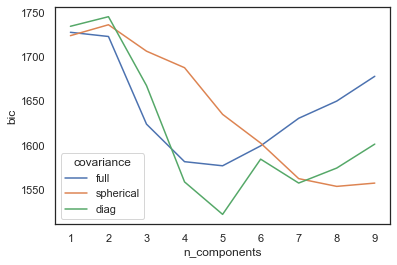

In [34]:
sns.lineplot('n_components', 'bic', data=gmm_df, hue='covariance')


D:\Program Files\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='n_components', ylabel='aic'>

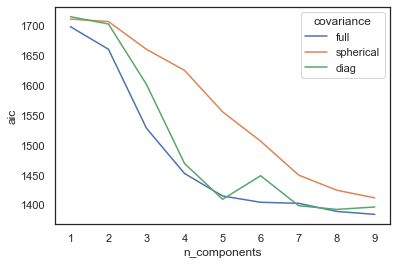

In [35]:
sns.lineplot('n_components', 'aic', data=gmm_df, hue='covariance')


In [36]:
GMM_Final = gmm(n_components=5, covariance_type='diag', random_state=0).fit(se)


### Based on the AIC & BIC curve, we can say that the best n components we can go with is 5 and the best covariance would be "Diag" for our model.


In [37]:
# Clusters labels
labels = GMM_Final.predict(se)


In [38]:
labels


array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1,
       3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4], dtype=int64)

In [39]:
col = df.columns


In [40]:
GMM_data = pd.DataFrame(se, columns=col)


In [41]:
GMM_data.loc[:, 'label'] = labels


# Show Result


D:\Program Files\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

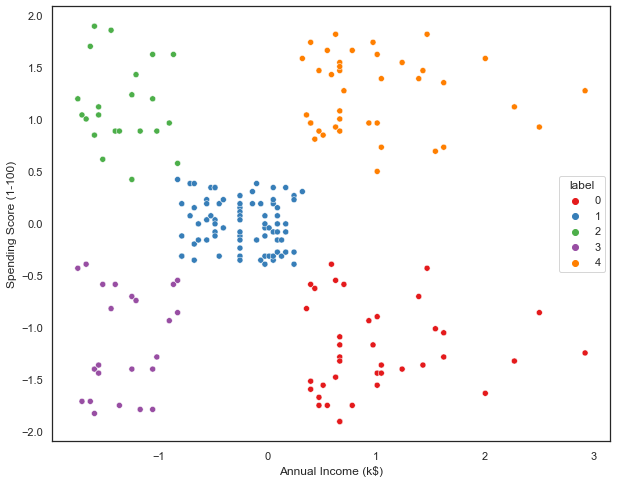

In [42]:
plt.figure(figsize=(10, 8))
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',
                data=GMM_data, hue='label', legend='full', palette='Set1')


In [43]:
GMM_data['label'].value_counts().to_frame()


,label
1,78
4,39
0,38
3,23
2,22


D:\Program Files\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

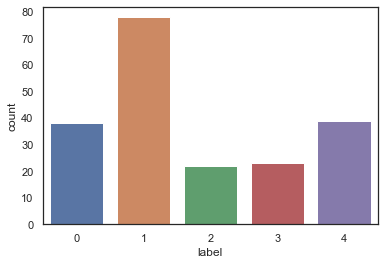

In [44]:
sns.countplot(GMM_data['label'], data=GMM_data)
